In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import sqlite3

In [3]:
sqlite_conn = sqlite3.connect('climate_impact_agriculture.db')

third_climate_df = pd.read_sql_query("SELECT * FROM climate_impact_agriculture;", sqlite_conn)

sqlite_conn.close()

third_climate_df.head()

,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,Irrigation_Access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [5]:
# Group data by Country and Year

grouped_data1 = third_climate_df.groupby(['country', 'year'])['average_temperature_c'].mean().reset_index()

In [6]:
grouped_data1

,country,year,average_temperature_c
0,Argentina,1990,17.630800
1,Argentina,1991,14.385135
2,Argentina,1992,17.700000
3,Argentina,1993,12.248421
4,Argentina,1994,10.687600
...,...,...,...
345,USA,2020,16.227742
346,USA,2021,16.633871
347,USA,2022,17.021071
348,USA,2023,13.731111


In [7]:
print(third_climate_df.columns)

Index(['year', 'country', 'region', 'crop_type', 'average_temperature_c',
       'total_precipitation_mm', 'co2_emissions_mt', 'crop_yield_mt_per_ha',
       'extreme_weather_events', 'Irrigation_Access_%',
       'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha',
       'soil_health_index', 'adaptation_strategies',
       'economic_impact_million_usd'],
      dtype='object')


In [8]:
print(grouped_data1.columns)

Index(['country', 'year', 'average_temperature_c'], dtype='object')


In [9]:
print(grouped_data1.columns)

Index(['country', 'year', 'average_temperature_c'], dtype='object')


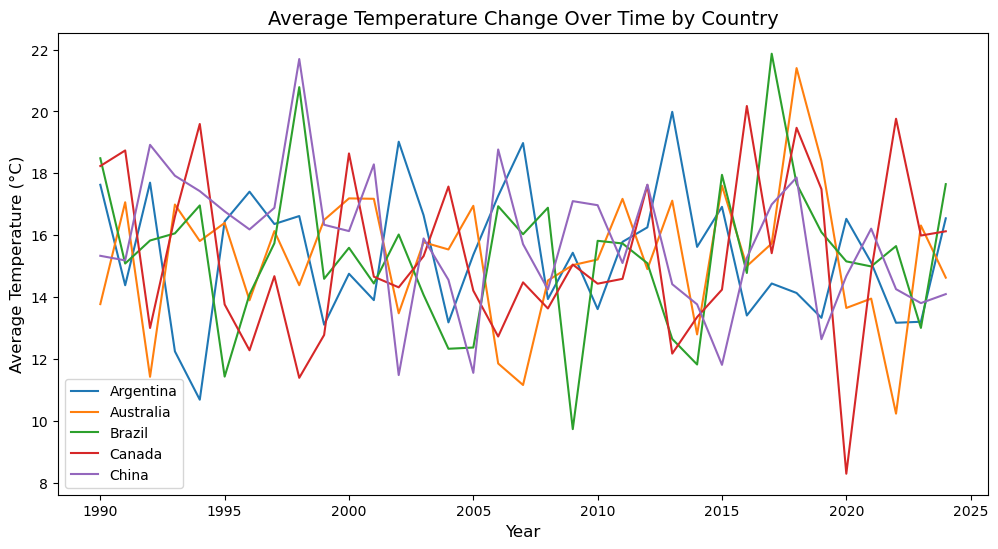

In [33]:

plt.figure(figsize=(12, 6))

for country in grouped_data1['country'].unique()[:5]:  # First 5 countries to avoid clutter
    country_data = grouped_data1[grouped_data1['country'] == country]
    plt.plot(country_data['year'], country_data['average_temperature_c'], label=country)

plt.title('Average Temperature Change Over Time by Country', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend()
plt.show()

Correlation between Year and Average Temperature: -0.022014121114662076


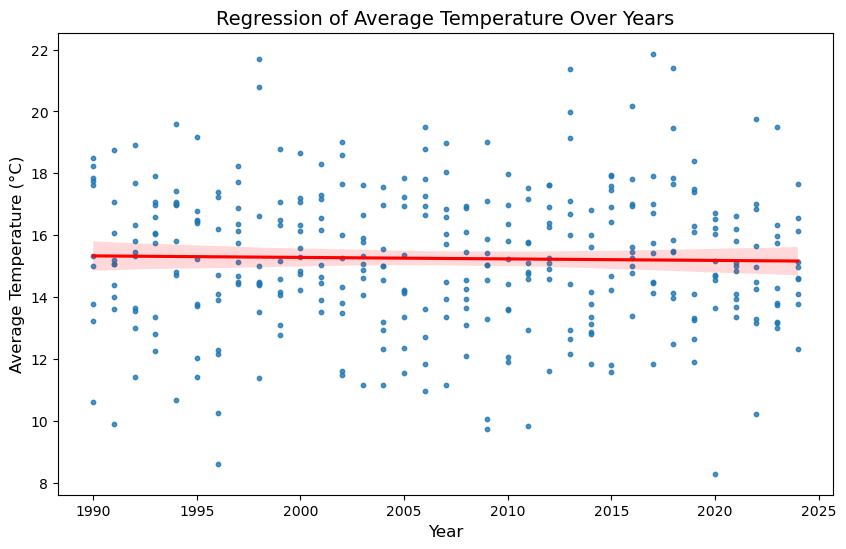

In [31]:
# Calculate correlation
correlation = grouped_data1['year'].corr(grouped_data1['average_temperature_c'])
print(f"Correlation between Year and Average Temperature: {correlation}")

# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='average_temperature_c', data=grouped_data1, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression of Average Temperature Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.show()

In [11]:
grouped_data2 = third_climate_df.groupby(['country', 'year'])['co2_emissions_mt'].mean().reset_index()

In [12]:
grouped_data2

,country,year,co2_emissions_mt
0,Argentina,1990,16.120400
1,Argentina,1991,15.547297
2,Argentina,1992,15.325417
3,Argentina,1993,14.518947
4,Argentina,1994,16.180400
...,...,...,...
345,USA,2020,15.417419
346,USA,2021,13.761613
347,USA,2022,17.217143
348,USA,2023,13.312222


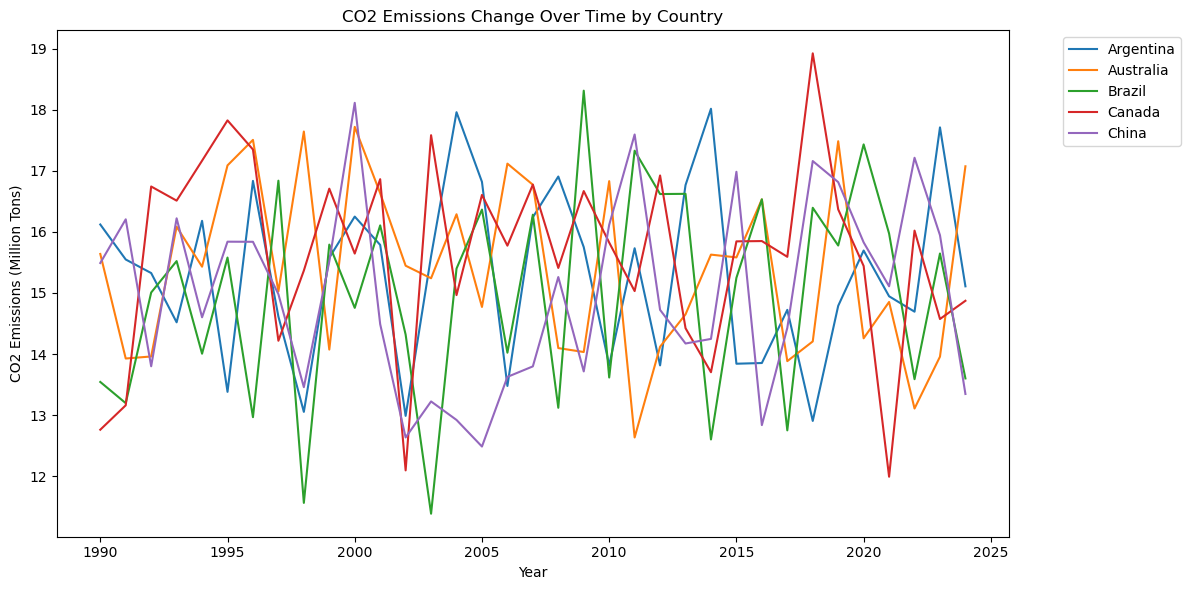

In [13]:
plt.figure(figsize=(12, 6))
for country in grouped_data2['country'].unique()[:5]:  # Take only the first 5 countries to avoid clutter
    country_data = grouped_data2[grouped_data2['country'] == country]
    plt.plot(country_data['year'], country_data['co2_emissions_mt'], label=country)

plt.title('CO2 Emissions Change Over Time by Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
grouped_data3 = third_climate_df.groupby(['region', 'year'])['crop_yield_mt_per_ha'].mean().reset_index()

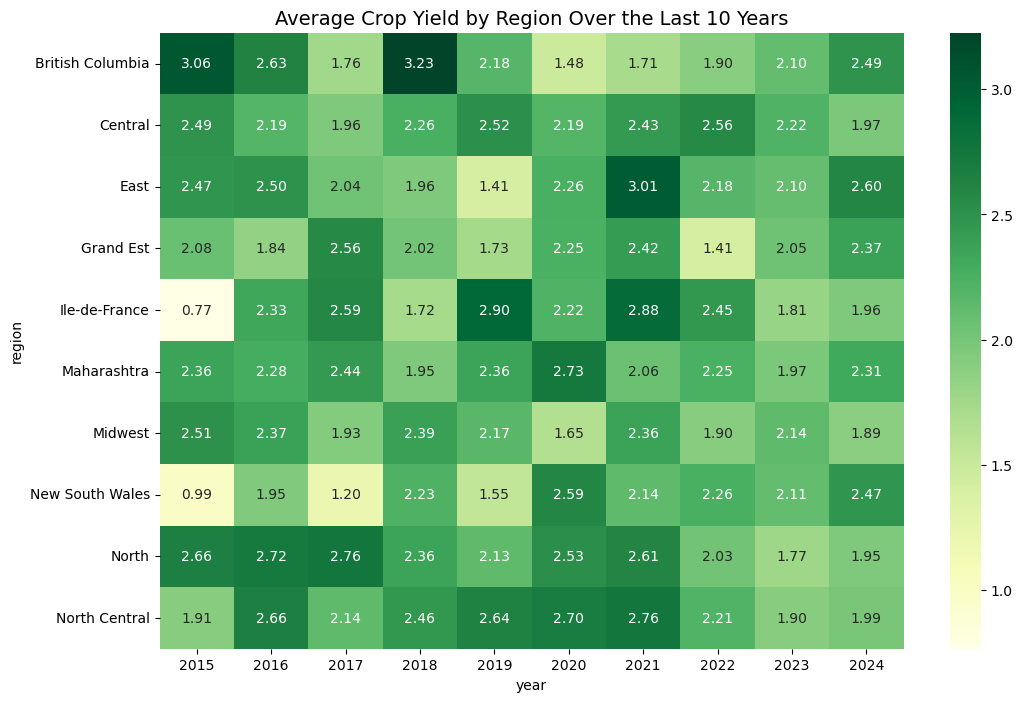

In [30]:
# Create pivot table with the first 10 regions and the last 10 years
pivot_yield = grouped_data3.pivot_table(values='crop_yield_mt_per_ha', index='region', columns='year').head(10)
pivot_yield = pivot_yield.iloc[:, -10:]  # Select the last 10 years

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_yield, cmap='YlGn', annot=True, fmt='.2f')

# Add title and display
plt.title('Average Crop Yield by Region Over the Last 10 Years', fontsize=14)
plt.show()

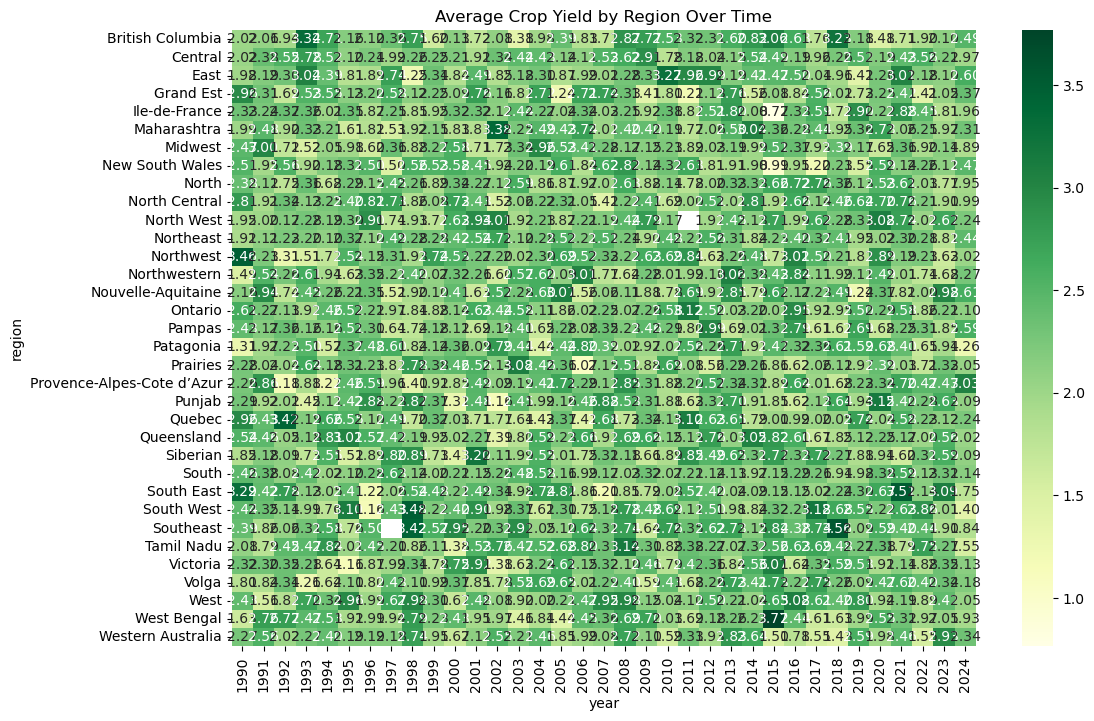

In [17]:
pivot_yield = grouped_data3.pivot_table(values='crop_yield_mt_per_ha', index='region', columns='year')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_yield, cmap='YlGn', annot=True, fmt='.2f')
plt.title('Average Crop Yield by Region Over Time')
plt.show()

In [18]:
average_temp = third_climate_df.groupby(["year","country","region"])["average_temperature_c"].mean().reset_index()


In [19]:
average_temp

,year,country,region,average_temperature_c
0,1990,Argentina,Northeast,17.354545
1,1990,Argentina,Northwest,14.210000
2,1990,Argentina,Pampas,21.651250
3,1990,Argentina,Patagonia,11.343333
4,1990,Australia,New South Wales,18.863333
...,...,...,...,...
1393,2024,Russia,Volga,10.861111
1394,2024,USA,Midwest,14.253000
1395,2024,USA,Northeast,17.322500
1396,2024,USA,South,13.107500


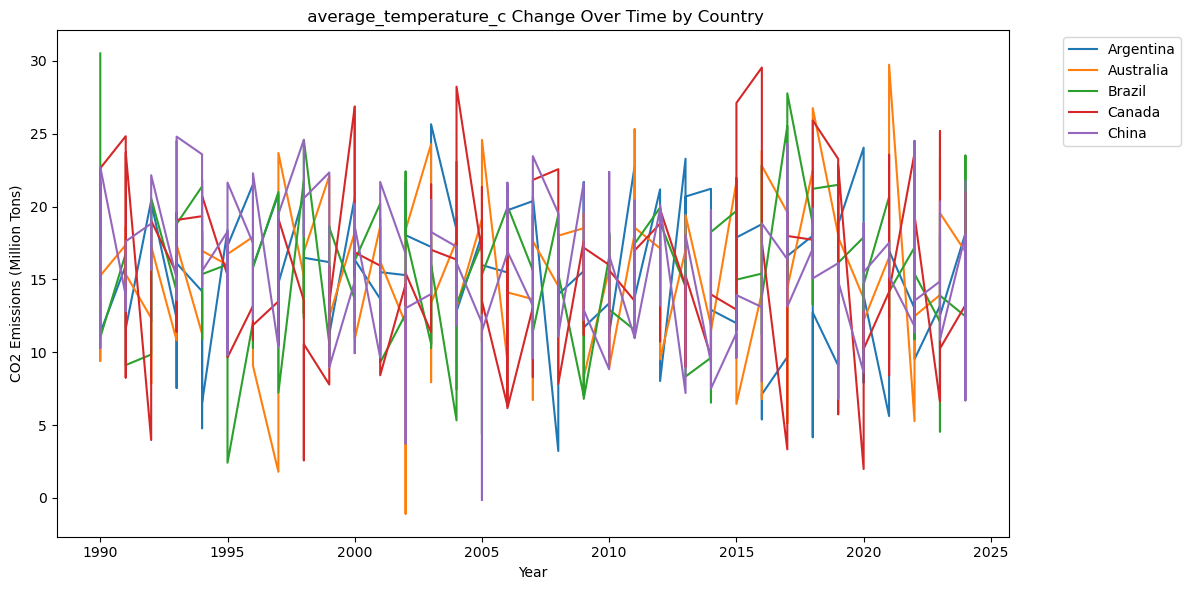

In [22]:
plt.figure(figsize=(12, 6))
for country in grouped_data2['country'].unique()[:5]:  # Take only the first 5 countries to avoid clutter
    country_data =average_temp [average_temp['country'] == country]
    plt.plot(country_data['year'], country_data['average_temperature_c'], label=country)

plt.title(' average_temperature_c Change Over Time by Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

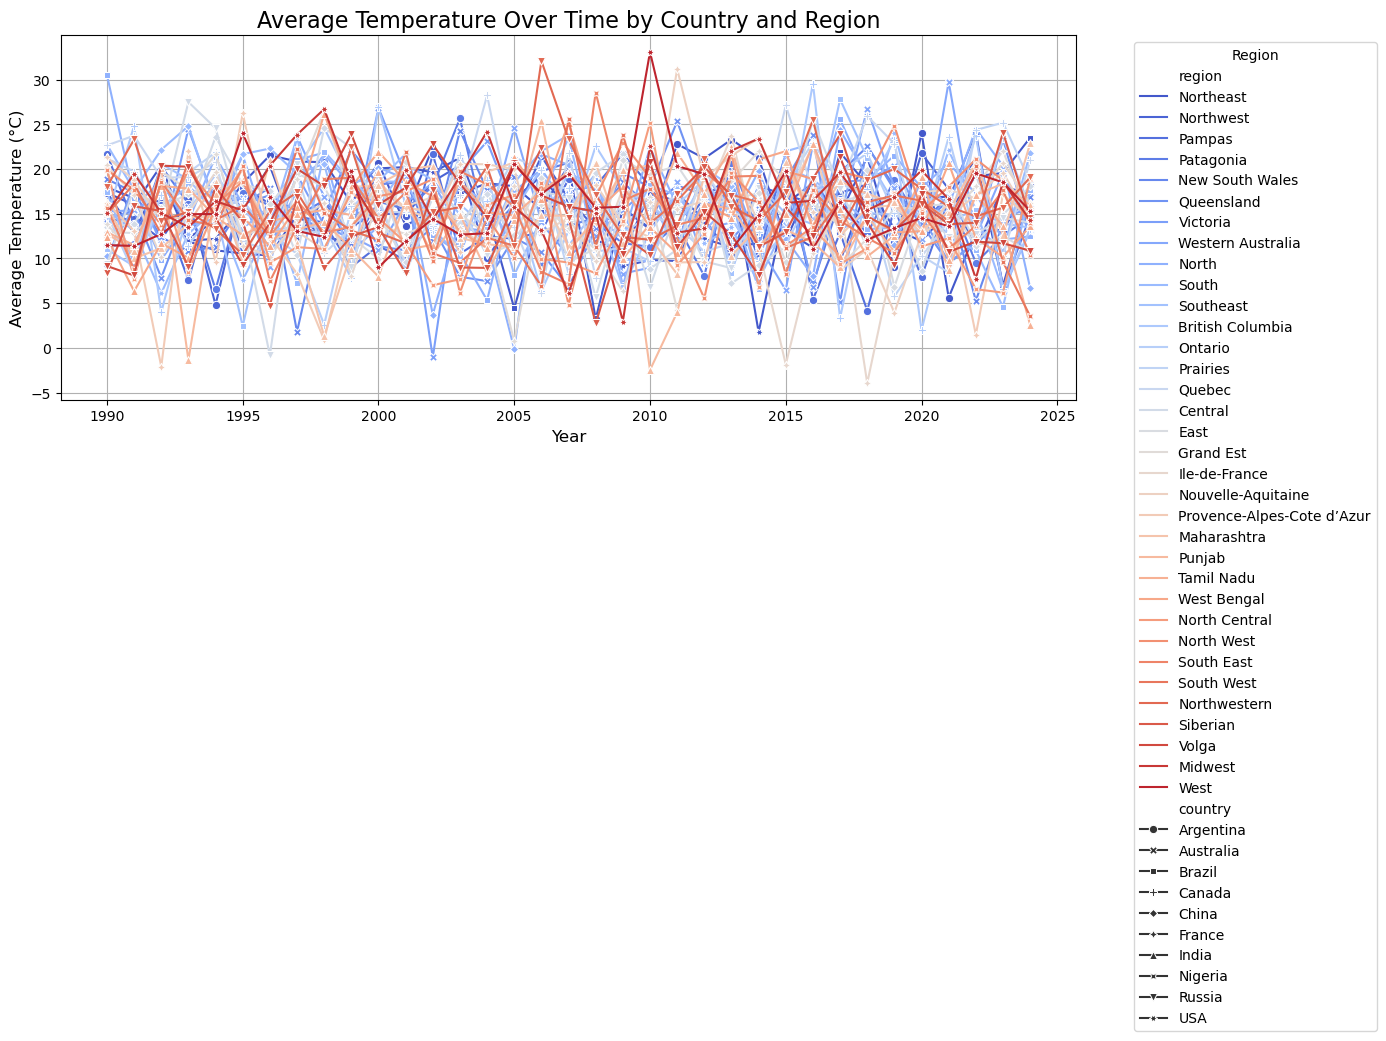

In [20]:
# Set up a larger plot size
plt.figure(figsize=(14, 8))

# Create a line plot for average temperature over time by country, with color coding by region
sns.lineplot(data=average_temp, 
             x="year", 
             y="average_temperature_c", 
             hue="region", 
             style="country", 
             markers=True, 
             dashes=False, 
             palette="coolwarm")

# Customize the plot
plt.title('Average Temperature Over Time by Country and Region', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
average_temp = third_climate_df.groupby(["year"])["average_temperature_c"].mean().reset_index()

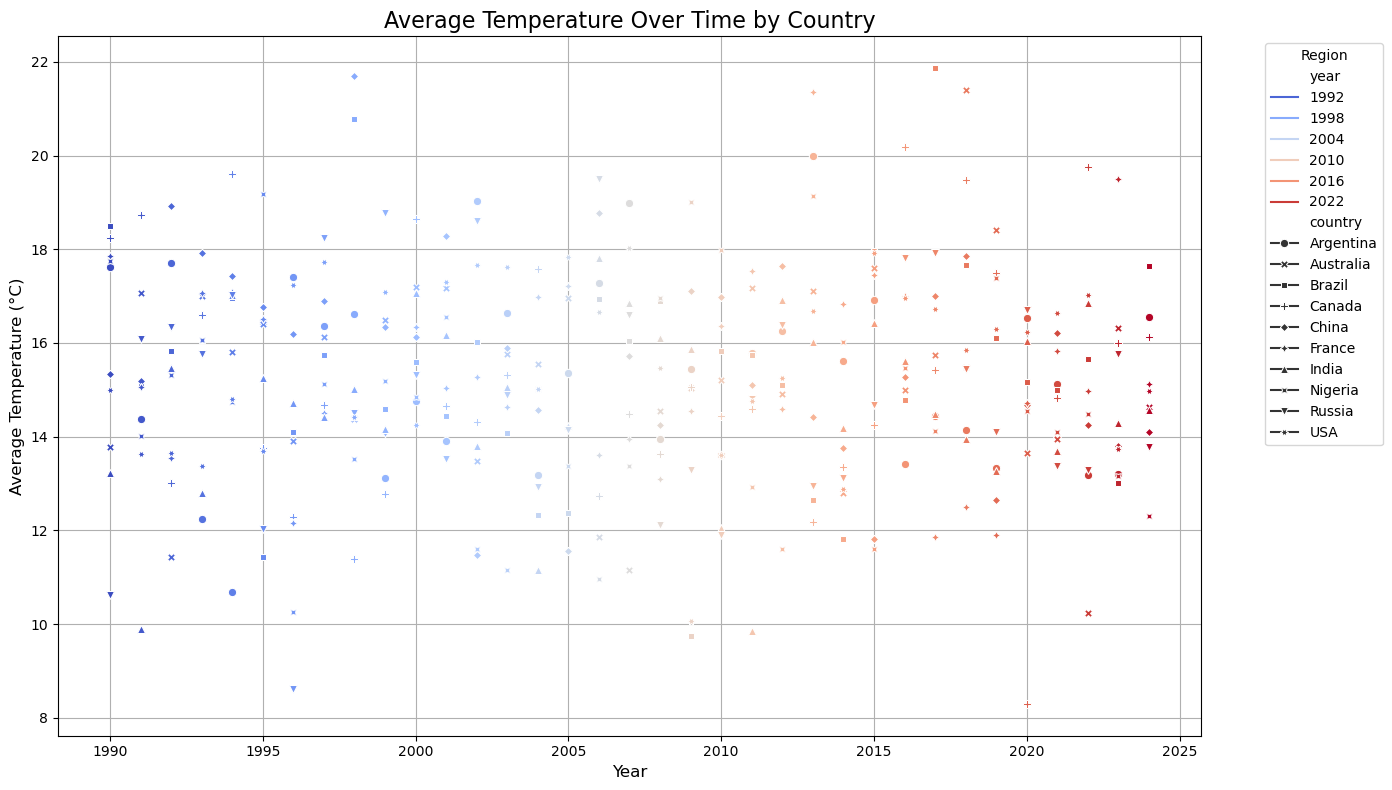

In [22]:
# Set up a larger plot size
plt.figure(figsize=(14, 8))

# Create a line plot for average temperature over time by country, with color coding by region
sns.lineplot(data=average_temp, 
             x="year", 
             y="average_temperature_c", 
             hue="year", 
             style="country", 
             markers=True, 
             dashes=False, 
             palette="coolwarm")

# Customize the plot
plt.title('Average Temperature Over Time by Country', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\sura_\AppData\Local\Temp\ipykernel_18476\4068999098.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=average_temp,
C:\Users\sura_\AppData\Local\Temp\ipykernel_18476\4068999098.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=average_temp,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


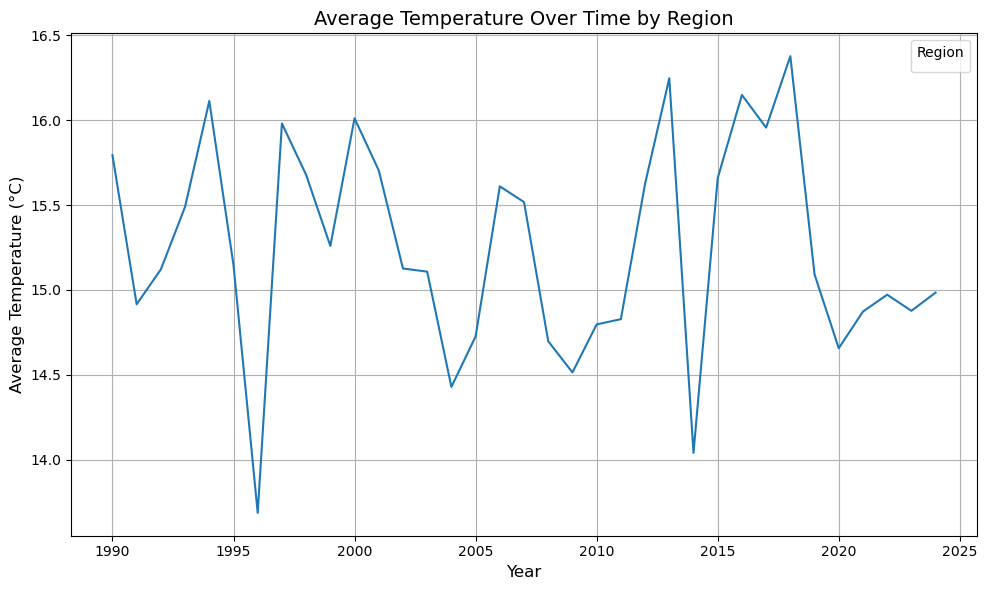

In [26]:
plt.figure(figsize=(10, 6))

# Create a simple line plot for average temperature over time by region
sns.lineplot(data=average_temp, 
             x="year", 
             y="average_temperature_c", 
              
             ci=None,  # No confidence interval shading
             palette="tab10")

# Customize the plot
plt.title('Average Temperature Over Time by Region', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='Region', loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\sura_\AppData\Local\Temp\ipykernel_18476\2785529541.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=average_temp,


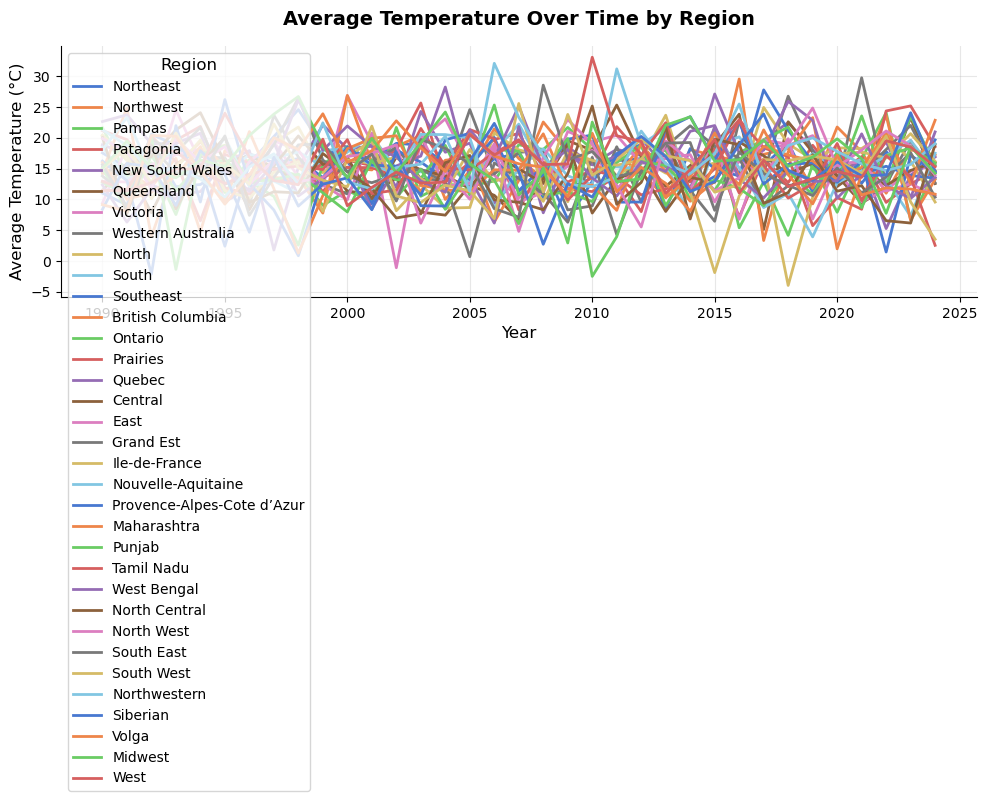

In [30]:
plt.figure(figsize=(10, 6))

# Create a clean line plot for average temperature over time by region
sns.lineplot(data=average_temp, 
             x="year", 
             y="average_temperature_c", 
             hue="region", 
             palette="muted",  # Softer colors for a minimalistic look
             ci=None,  # No confidence interval shading
             linewidth=2.0)  # Slightly thicker lines for clarity

# Customize the plot for a clean, minimalist look
plt.title('Average Temperature Over Time by Region', fontsize=14, weight='bold', pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Region', loc='best', fontsize=10, title_fontsize=12)
plt.grid(True, alpha=0.3)  # Light grid for clarity

# Remove spines for a clean look
sns.despine()

# Show the plot with tight layout for neat spacing
plt.tight_layout()
plt.show()

In [24]:
co2_emissions = third_climate_df.groupby(["year","country","region"])["co2_emissions_mt"].mean().reset_index()

In [25]:
co2_emissions= third_climate_df.groupby(["year"])["co2_emissions_mt"].mean().reset_index()

In [36]:
co2_emissions

,year,co2_emissions_mt
0,1990,14.898240
1,1991,15.400287
2,1992,14.898504
3,1993,15.020078
4,1994,15.874361
5,1995,15.882094
6,1996,15.658712
7,1997,14.842648
8,1998,14.806653
9,1999,15.745910
